# Feature Selection on the Soccer Dataset


What are the most valued skills by the soccer industry?

Naturally, it depends on the positions of the player in the soccer field. 

#### Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Import Data

In [5]:
soccer_data = pd.read_csv('Datasets/players_20.csv') 

In [6]:
soccer_data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,6/24/1987,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,2/5/1985,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,2/5/1992,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1/7/1993,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1/7/1991,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


#### Filter English Teams

In [8]:
EPL_list = ['Arsenal', 'Aston Villa', 'Bournemouth', 'Brighton & Hove Albion', 
            'Burnley', 'Chelsea', 'Crystal Palace','Everton', 'Leicester City', 
            'Liverpool', 'Manchester City', 'Manchester United', 'Newcastle United', 
            'Norwich City', 'Sheffield United', 'Southampton', 'Tottenham Hotspur', 
            'Watford', 'West Ham United', 'Wolverhampton Wanderers']

In [6]:
soccer_data['new'] = soccer_data['club'].apply(lambda x: 1 if x in EPL_list else 0)
EPL_data = soccer_data[soccer_data['new'] == 1]

#### Filter Data

In [7]:
EPL_data = EPL_data.dropna(axis='columns') # remove NA's
EPL_data = EPL_data[EPL_data['player_positions'] != 'GK'] # remove Goalkeepers
EPL_data = EPL_data.loc[:,~EPL_data.columns.str.contains('^goalkeeping', case=False)] # remove Goalkeepers skills 
EPL_data = EPL_data._get_numeric_data() # remove non-numerical data
EPL_data= EPL_data.drop(columns=['sofifa_id', 'new', 'value_eur', 'team_jersey_number','contract_valid_until', 'overall', 'potential'])

#### Data Exploration

In [8]:
EPL_data.columns

Index(['age', 'height_cm', 'weight_kg', 'wage_eur', 'international_reputation',
       'weak_foot', 'skill_moves', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle'],
      dtype='object')

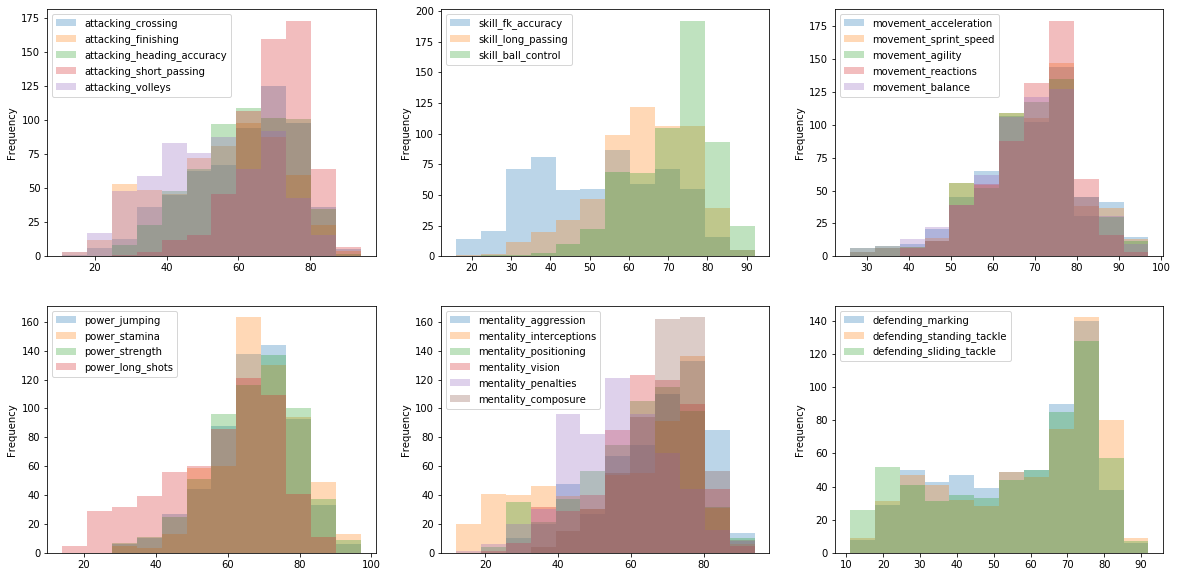

In [9]:
from matplotlib.pyplot import figure

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
# fig, ax = plt.subplots()

EPL_data.loc[:, ['attacking_crossing', 'attacking_finishing', 
                 'attacking_heading_accuracy', 'attacking_short_passing',
                 'attacking_volleys']].plot.hist(bins=12, alpha=0.3, ax=axes[0,0])

EPL_data.loc[:, ['skill_fk_accuracy', 'skill_long_passing', 
                 'skill_ball_control']].plot.hist(bins=12, alpha=0.3, ax=axes[0,1])

EPL_data.loc[:, ['movement_acceleration', 'movement_sprint_speed', 
                 'movement_agility', 'movement_reactions', 
                 'movement_balance']].plot.hist(bins=12, alpha=0.3, ax=axes[0,2])

EPL_data.loc[:, ['power_jumping', 'power_stamina', 'power_strength',
                 'power_long_shots']].plot.hist(bins=12, alpha=0.3, ax=axes[1,0])

EPL_data.loc[:, ['mentality_aggression', 'mentality_interceptions',
                 'mentality_positioning', 'mentality_vision', 'mentality_penalties',
                 'mentality_composure']].plot.hist(bins=12, alpha=0.3, ax=axes[1,1])

EPL_data.loc[:, ['defending_marking', 'defending_standing_tackle',
                 'defending_sliding_tackle']].plot.hist(bins=12, alpha=0.3, ax=axes[1,2])


### Regularization

Why will we need regularization in this process?

Simple: We have a limited list of a bit more than 400 strickers. However we have almost 30 predictor variables. And we now that not all the variables are relevant. But we do not know which!

We will perform an analysis using `glmnet`, which is a standard library to perform regressions such as ridge regression, lasso and ElasticNet.It has a different syntax than the traditional `lm`.Important remarks about the library are:
- We must pass in an x matrix as well as a y vector.
- Important: Make sure that there are no missing values in the data or the code won't run.


#### Importing the Data

In [36]:
soccer_data = pd.read_csv('players_20.csv') 

strickers <- read.csv('Datasets/strickers.csv', encoding = 'UTF-8') # import file
strickers <- strickers[!duplicated(strickers[1]),] # eliminate duplicates
rownames(strickers) <- strickers$Name # define player name as rowname 
strickers <- strickers[,c(-1, -2, -3)] # clean table from unwanted columns

In [37]:
# dimensions
names(strickers) 

[1] "Rating"             "Ball_Control"       "Dribbling"         
 [4] "Marking"            "Sliding_Tackle"     "Standing_Tackle"   
 [7] "Aggression"         "Reactions"          "Attacking_Position"
[10] "Interceptions"      "Vision"             "Composure"         
[13] "Crossing"           "Short_Pass"         "Long_Pass"         
[16] "Acceleration"       "Speed"              "Stamina"           
[19] "Strength"           "Balance"            "Agility"           
[22] "Jumping"            "Heading"            "Shot_Power"        
[25] "Finishing"          "Long_Shots"         "Curve"             
[28] "Freekick_Accuracy"  "Penalties"          "Volleys"

In [38]:
paste('Number of Stricker:', nrow(strickers))
paste('Number of Attributes:', ncol(strickers))

[1] "Number of Stricker: 426"

[1] "Number of Attributes: 30"

In [39]:
head(strickers)

,Rating,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Luis Suárez,92,91,86,30,38,45,78,93,92,41,...,86,69,77,87,94,86,86,84,85,88
Robert Lewandowski,90,87,85,25,19,42,80,88,89,39,...,78,84,85,86,91,82,77,76,81,86
Zlatan Ibrahimović,90,90,87,15,27,41,84,85,86,20,...,86,72,80,93,90,88,82,82,91,93
Gonzalo Higuaín,89,85,84,12,18,22,50,86,92,20,...,75,77,80,86,92,80,74,62,70,88
Sergio Agüero,89,89,89,13,12,20,57,88,91,24,...,86,80,68,87,90,84,82,72,80,85
Alexis Sánchez,88,86,89,30,35,39,80,87,86,42,...,90,85,70,84,85,81,78,78,77,83


As we can see there are 426 players and the 30 attributes. 

#### Data Exploration




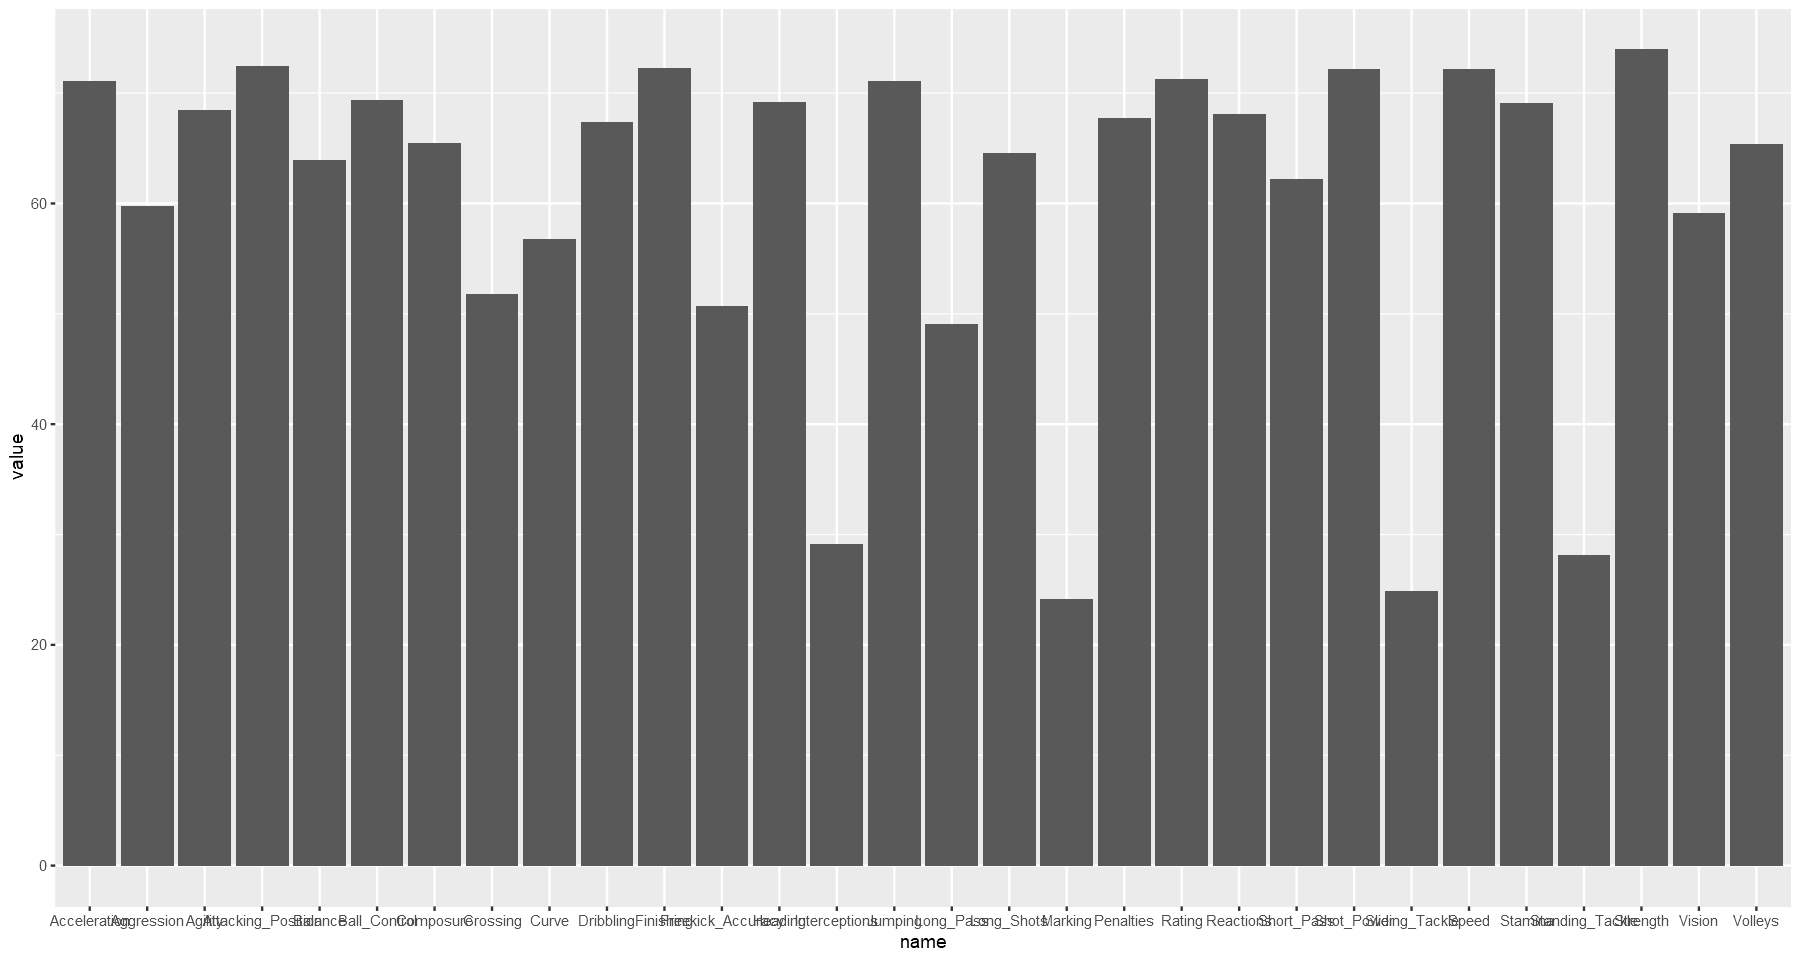

In [56]:
options(repr.plot.width=15, repr.plot.height=8) # area of display

# Load ggplot2
library(ggplot2)

# Create data
data <- data.frame(
  name=names(strickers) ,  
  value= colMeans(strickers)
  )

# Barplot
ggplot(data, aes(x=name, y=value)) + 
  geom_bar(stat = "identity")

The `model.matrix()` function is particularly useful for creating x; not only does it produce a matrix corresponding to the all predictors but it also automatically transforms any qualitative variables into dummy variables. The latter property is important because glmnet() can only take numerical, quantitative inputs.

In [41]:
x = model.matrix(Rating ~ .,strickers)[,-1]
y = strickers$Rating
y = y[!is.na(y)]

#### Ridge Regression
The `glmnet()` function has an alpha argument that determines what type of model is fit. If `alpha=0` then a **ridge** regression model is fit, and if `alpha=1` then a **lasso** model is fit. We first fit a ridge regression model.

In [42]:
lambda = seq (0.5,50.5, length =100) # vector of lambdas
ridge.mod = glmnet(x, y, alpha = 0, lambda = lambda)

By default the glmnet() function performs ridge regression for an automatically selected range of `λ` values. 
Nevertheless, we have chosen to implement with a range from  `λ = 0 to λ = 50`. 

- Essentially we cover the full range of scenarios from the null model containing only the intercept, to the least squares fit.
- By default, the glmnet() function standardizes the variables so that they are on the same scale. 
    - To turn off this default setting, use the argument standardize=FALSE. 
- Associated with each value of λ is a vector of ridge regression coefficients, stored in a matrix that can be accessed by coef(). 
- In this case, it is a 30×10001 matrix, with 30 rows (one for each predictor, plus an intercept) and 10001 columns (one for each value of λ).

In [43]:
dim(coef(ridge.mod))

[1]  30 100

We expect the coefficient estimates to be much smaller, in terms of L2 norm, when a large value of λ is used, as compared to when a small value of λ is used. Let's build a table to analyse the difference of coefficients according to different λ.

In [44]:
head(data.frame("Lambda[1]" = coef(ridge.mod)[,1], "Lambda[100]" = coef(ridge.mod)[,100]))

,Lambda.1.,Lambda.100.
,<dbl>,<dbl>
(Intercept),37.582364453,2.260865471
Ball_Control,0.042340493,0.116733508
Dribbling,0.034237806,0.081261165
Marking,-0.001276353,-0.006813996
Sliding_Tackle,0.002210930,0.002312083
Standing_Tackle,0.004978536,0.002330785


#### Spliting the data in train and test

In [45]:
set.seed (200)
train=sample (1: nrow(x), nrow(x)/2)
test=(- train )
y.test=y[test]

Next we fit a ridge regression model on the training set, and evaluate its MSE on the test set, using λ = 4. Note the use of the predict() function again. This time we get predictions for a test set, by replacing type="coefficients" with the newx argument.

In [46]:
ridge.mod = glmnet (x[train ,],y[train],alpha = 0, lambda = lambda)
ridge.pred= predict (ridge.mod ,s=4, newx=x[test ,])
mean((ridge.pred -y.test)^2)

[1] 1.377963

We could also get the same result by fitting a ridge regression model with a very large value of λ. Note that 1e10 means 1010.

In [47]:
ridge.pred= predict (ridge.mod ,s=1e10 ,newx=x[test ,])
mean(( ridge.pred -y.test)^2)

[1] 8.327997

So fitting a ridge regression model with λ = 4 leads to a much lower test MSE than fitting a model with just an intercept. We now check whether there is any benefit to performing ridge regression with λ = 4 instead of just performing least squares regression. Recall that least squares is simply ridge regression with λ = 0.

In [48]:
ridge.pred = predict (ridge.mod ,s=0, newx=x[test ,], exact=T, x = x, y = y)
mean((ridge.pred -y.test)^2)
lm(y~x, subset =train)
predict (ridge.mod ,s = 0, exact = T, type="coefficients", x = x, y = y ) [1:20 ,]

[1] 0.4244286


Call:
lm(formula = y ~ x, subset = train)

Coefficients:
        (Intercept)        xBall_Control           xDribbling  
           1.974071             0.141141             0.079288  
           xMarking      xSliding_Tackle     xStanding_Tackle  
          -0.005695             0.005601             0.005456  
        xAggression           xReactions  xAttacking_Position  
           0.001534             0.101955             0.121790  
     xInterceptions              xVision           xComposure  
          -0.010859             0.003282             0.002324  
          xCrossing          xShort_Pass           xLong_Pass  
           0.007834             0.072527             0.013460  
      xAcceleration               xSpeed             xStamina  
           0.046769             0.030573             0.008857  
          xStrength             xBalance             xAgility  
           0.042752            -0.013534            -0.013072  
           xJumping             xHeading      

(Intercept)       Ball_Control          Dribbling            Marking 
       0.831774784        0.125045916        0.079181431       -0.005716615 
    Sliding_Tackle    Standing_Tackle         Aggression          Reactions 
       0.005637248        0.002645102       -0.002664837        0.084101549 
Attacking_Position      Interceptions             Vision          Composure 
       0.136425366       -0.006424697        0.003926689        0.003346808 
          Crossing         Short_Pass          Long_Pass       Acceleration 
       0.004067424        0.066308549        0.007323637        0.039502516 
             Speed            Stamina           Strength            Balance 
       0.037380960        0.003330825        0.045857578       -0.005940141

In general, if we want to fit a (unpenalized) least squares model, then we should use the lm() function, since that function provides more useful outputs, such as standard errors and p-values for the coefficients. In general, instead of arbitrarily choosing λ = 4, it would be better to use cross-validation to choose the tuning parameter λ. We can do this using the built-in cross-validation function, cv.glmnet(). By default, the function cv.glmnet() performs ten-fold cross-validation, though this can be changed using the argument nfolds. Note that we set a random seed first so our results will be reproducible, since the choice of the cross-validation folds is random.

[1] 0.5804739

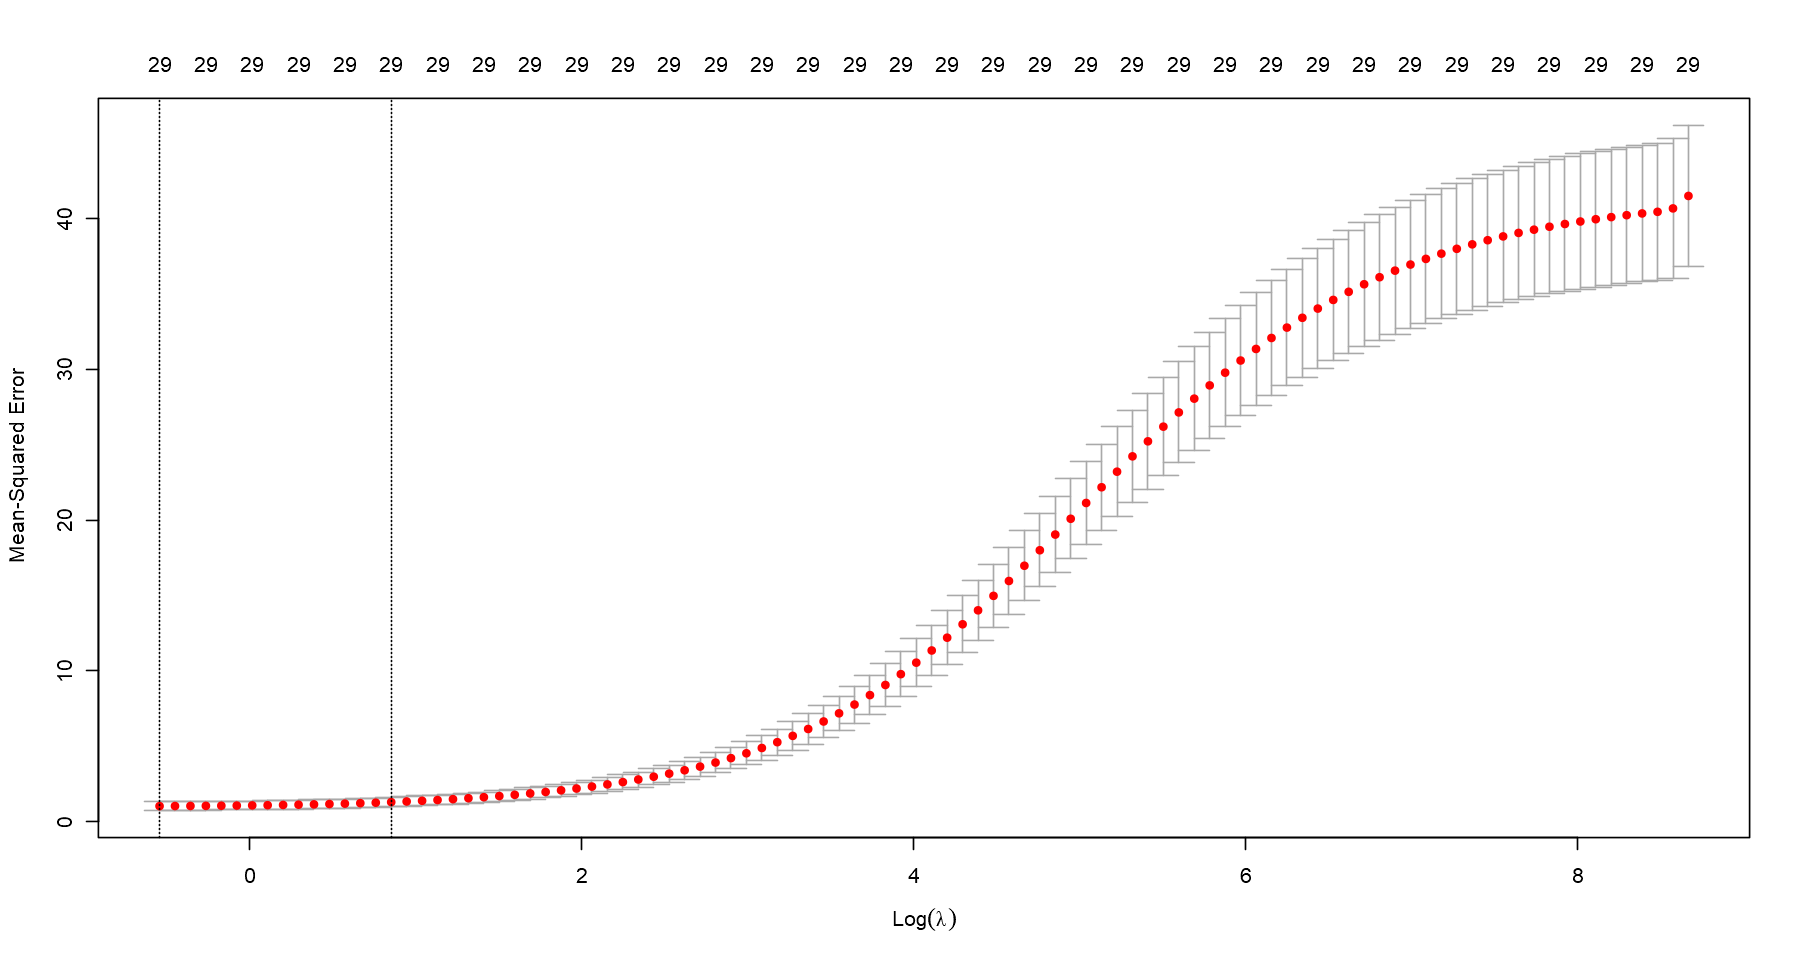

In [49]:
set.seed (20)
cv.out =cv.glmnet (x[train ,],y[train],alpha = 0)
plot(cv.out)
bestlam =cv.out$lambda.min
bestlam

Therefore, we see that the value of λ that results in the smallest crossvalidation error is 212. What is the test MSE associated with this value of λ?

In [50]:
ridge.pred=predict (ridge.mod ,s=bestlam ,newx=x[test ,])
mean(( ridge.pred -y.test)^2)

[1] 0.6526533

This represents a further improvement over the test MSE that we got using λ = 4. Finally, we refit our ridge regression model on the full data set, using the value of λ chosen by cross-validation, and examine the coefficient
estimates.

In [51]:
out=glmnet (x, y, alpha =0)
predict (out, type= "coefficients" , s=bestlam )[1:20 ,]

(Intercept)       Ball_Control          Dribbling            Marking 
       2.476400704        0.117114722        0.082305789       -0.006877536 
    Sliding_Tackle    Standing_Tackle         Aggression          Reactions 
       0.001850498        0.002429023       -0.000890667        0.079139163 
Attacking_Position      Interceptions             Vision          Composure 
       0.131887480       -0.004703669        0.006401467        0.009634777 
          Crossing         Short_Pass          Long_Pass       Acceleration 
       0.006020083        0.063701761        0.006345946        0.035455817 
             Speed            Stamina           Strength            Balance 
       0.036539846        0.004923355        0.043436234       -0.006705909

As expected, none of the coefficients are zero—ridge regression does not perform variable selection!

#### Lasso Regression
We saw that ridge regression with a wise choice of λ can outperform least squares as well as the null model on the Soccer data set. We now ask whether the lasso can yield either a more accurate or a more interpretable model than ridge regression. In order to fit a lasso model, we once again use the glmnet() function; however, this time we use the argument alpha=1. Other than that change, we proceed just as we did in fitting a ridge model.

Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"


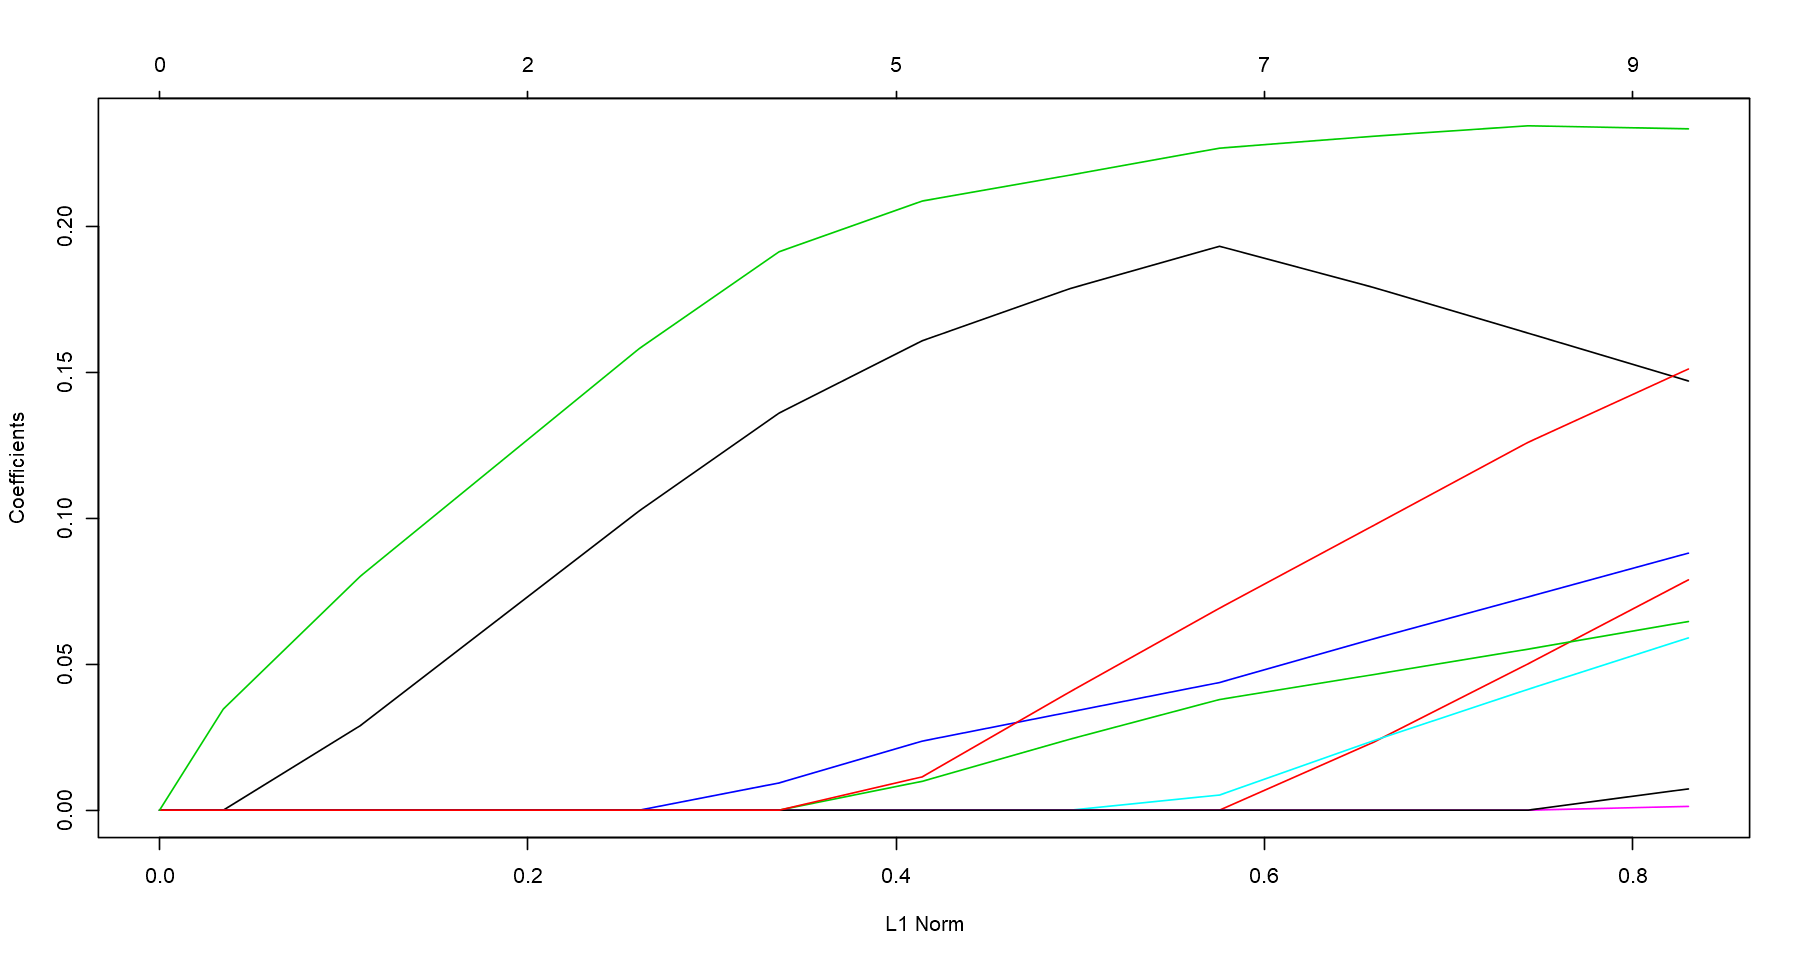

In [52]:
lasso.mod =glmnet (x[train ,],y[train],alpha =1, lambda =lambda)
plot(lasso.mod)

We can see from the coefficient plot that depending on the choice of tuning parameter, some of the coefficients will be exactly equal to zero. We now perform cross-validation and compute the associated test error.

[1] 1.301749

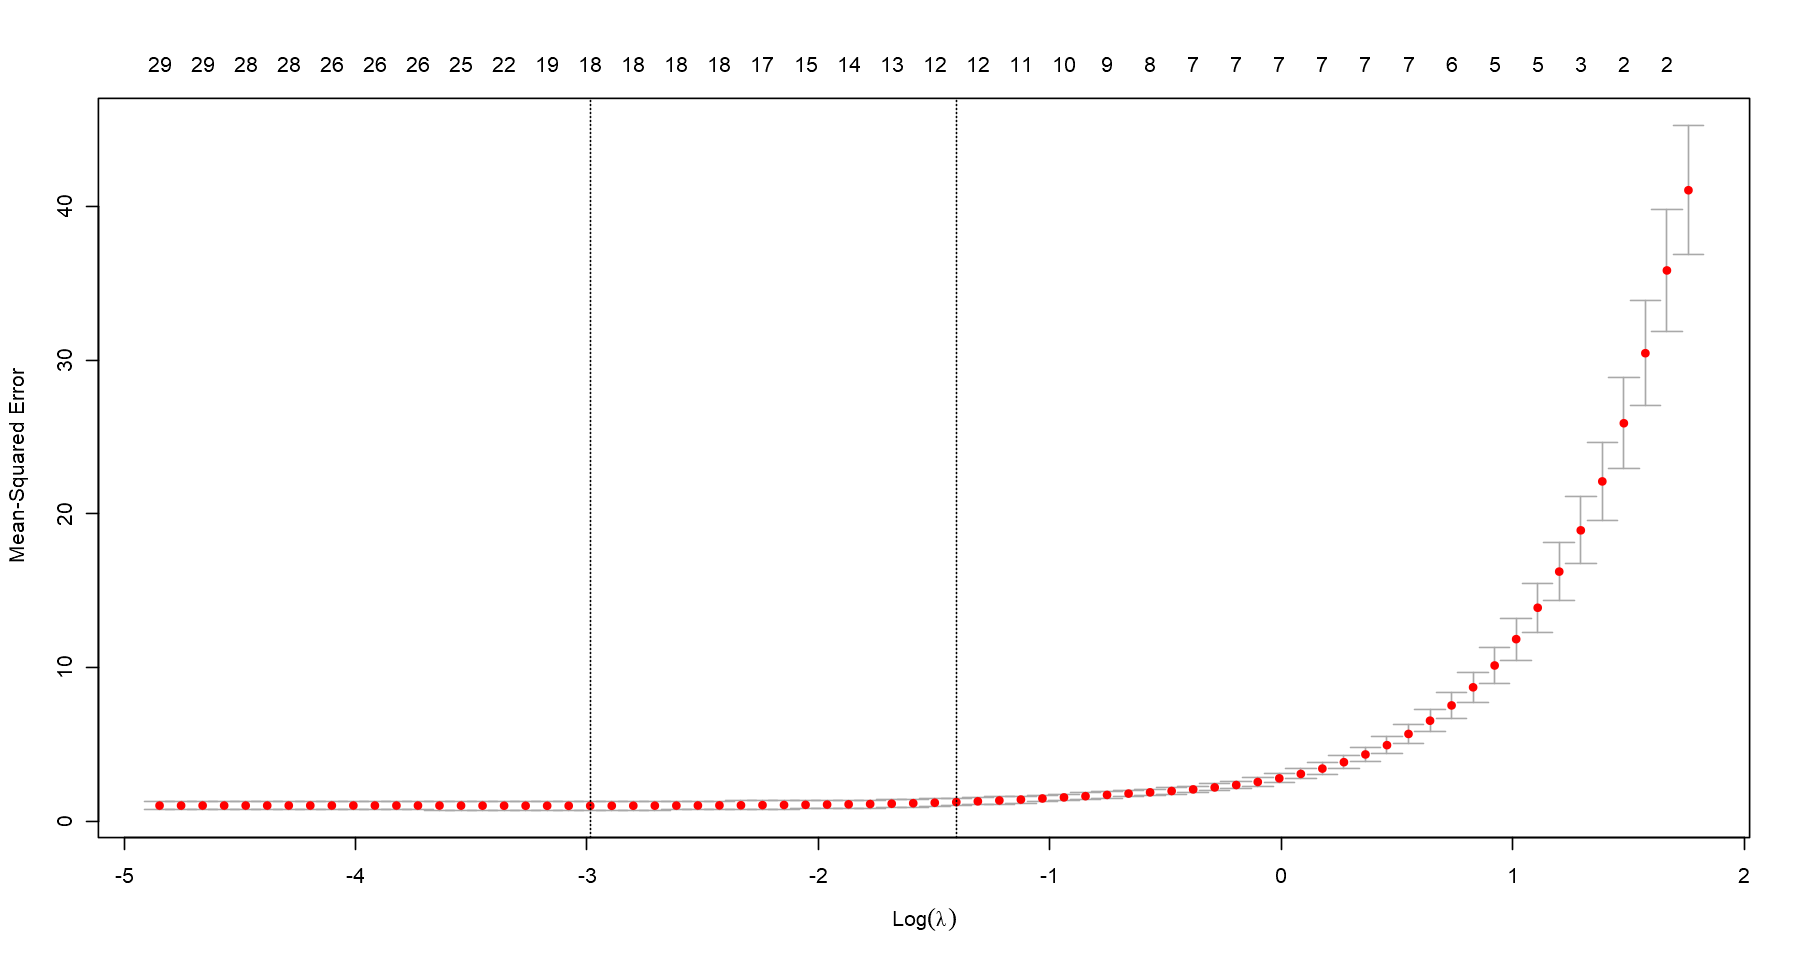

In [53]:
set.seed (1)
cv.out = cv.glmnet(x[train ,],y[train],alpha =1)
plot(cv.out)
bestlam = cv.out$lambda.min
lasso.pred=predict (lasso.mod, s=bestlam, newx=x[test ,])
mean((lasso.pred -y.test)^2)

This is substantially lower than the test set MSE of the null model and of least squares, and very similar to the test MSE of ridge regression with λ chosen by cross-validation. However, the lasso has a substantial advantage over ridge regression in that the resulting coefficient estimates are sparse. Here we see that 12 of the 19 coefficient estimates are exactly zero. So the lasso model with λ chosen by cross-validation contains only seven variables.

In [55]:
out=glmnet (x,y,alpha =1, lambda =lambda)
lasso.coef= predict (out ,type ="coefficients",s=bestlam )[1:20 ,]
lasso.coef

(Intercept)       Ball_Control          Dribbling            Marking 
       13.19865267         0.14392405         0.08517409         0.00000000 
    Sliding_Tackle    Standing_Tackle         Aggression          Reactions 
        0.00000000         0.00000000         0.00000000         0.05709122 
Attacking_Position      Interceptions             Vision          Composure 
        0.12006368         0.00000000         0.00000000         0.00000000 
          Crossing         Short_Pass          Long_Pass       Acceleration 
        0.00000000         0.05232582         0.00000000         0.00000000 
             Speed            Stamina           Strength            Balance 
        0.00000000         0.00000000         0.00000000         0.00000000

# References